<a href="https://colab.research.google.com/github/Eskdagoat/5105/blob/main/AndrewNicola_801136465_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#ORIGINAL CODE FROM LECTURE NOTES

import torch
import torch.optim as optim

# Training data
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

# Normalize the input
t_un = 0.1 * t_u

def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

params = torch.tensor([1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=1e-2)

n_epochs = 5000
for epoch in range(n_epochs):
    t_p = model(t_un, *params)
    loss = loss_fn(t_p, t_c)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss {loss.item():.4f}')

print(f'\nFinal Parameters: w={params[0].item():.4f}, b={params[1].item():.4f}')

Epoch 0, Loss 80.3643
Epoch 500, Loss 24.9258
Epoch 1000, Loss 15.7372
Epoch 1500, Loss 9.4454
Epoch 2000, Loss 5.7623
Epoch 2500, Loss 3.9305
Epoch 3000, Loss 3.1960
Epoch 3500, Loss 2.9770
Epoch 4000, Loss 2.9332
Epoch 4500, Loss 2.9280

Final Parameters: w=5.3660, b=-17.2952



Training with learning rate: 0.1
Epoch 0, Loss 675.7944
Epoch 500, Loss 2.7819
Epoch 1000, Loss 2.4855
Epoch 1500, Loss 2.2612
Epoch 2000, Loss 2.1439
Epoch 2500, Loss 2.1019
Epoch 3000, Loss 2.0921
Epoch 3500, Loss 2.0908
Epoch 4000, Loss 2.0907
Epoch 4500, Loss 2.0907

Final Parameters: w2=0.2830, w1=2.4760, b=-10.6496

Training with learning rate: 0.01
Epoch 0, Loss 675.7944
Epoch 500, Loss 6.1055
Epoch 1000, Loss 3.9339
Epoch 1500, Loss 3.1171
Epoch 2000, Loss 2.9317
Epoch 2500, Loss 2.8712
Epoch 3000, Loss 2.8128
Epoch 3500, Loss 2.7439
Epoch 4000, Loss 2.6645
Epoch 4500, Loss 2.5762

Final Parameters: w2=0.4673, w1=0.4768, b=-5.6706

Training with learning rate: 0.001
Epoch 0, Loss 675.7944
Epoch 500, Loss 103.3379
Epoch 1000, Loss 12.9833
Epoch 1500, Loss 8.0637
Epoch 2000, Loss 7.6883
Epoch 2500, Loss 7.2943
Epoch 3000, Loss 6.8299
Epoch 3500, Loss 6.3051
Epoch 4000, Loss 5.7384
Epoch 4500, Loss 5.1581

Final Parameters: w2=0.4484, w1=-0.0524, b=-1.7755

Training with learning

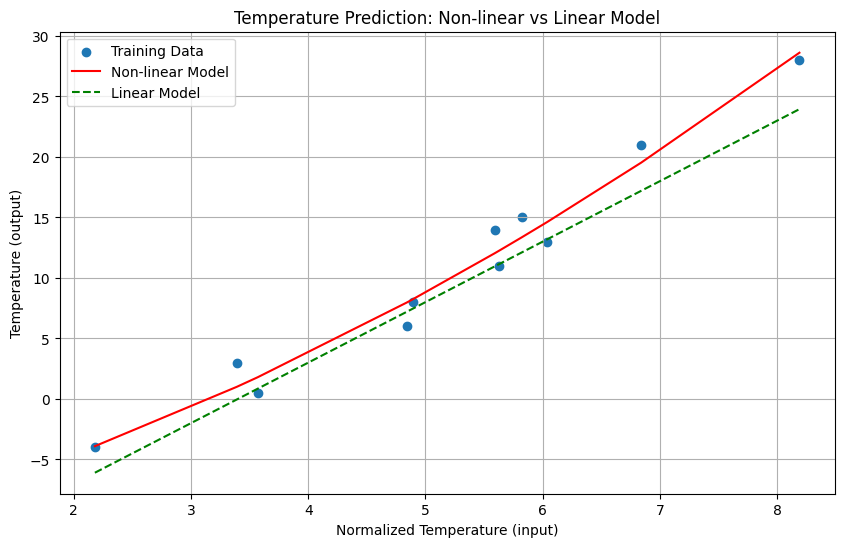

In [2]:
#question 1
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

# Training data (same as original)
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

# Normalize the input
t_un = 0.1 * t_u

def model_nonlinear(t_u, w2, w1, b):
    return w2 * t_u**2 + w1 * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

# Initialize three parameters now: w2, w1, b
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

# Function to train model with different learning rates
def train_model(lr):
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
    optimizer = optim.Adam([params], lr=lr)
    losses = []

    n_epochs = 5000
    for epoch in range(n_epochs):
        t_p = model_nonlinear(t_un, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f'Epoch {epoch}, Loss {loss.item():.4f}')
            losses.append(loss.item())

    print(f'\nFinal Parameters: w2={params[0].item():.4f}, w1={params[1].item():.4f}, b={params[2].item():.4f}')
    return params, losses

# Train with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
results = {}

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    final_params, losses = train_model(lr)
    results[lr] = (final_params, losses)

# Visualization function
def plot_models(best_lr_params):
    plt.figure(figsize=(10, 6))

    # Sort input data for smooth plotting
    t_un_sorted, indices = torch.sort(t_un)
    t_c_sorted = t_c[indices]

    # Plot training data points
    plt.scatter(t_un.numpy(), t_c.numpy(), label='Training Data')

    # Plot non-linear model prediction
    t_p_nonlinear = model_nonlinear(t_un_sorted, *best_lr_params)
    plt.plot(t_un_sorted.numpy(), t_p_nonlinear.detach().numpy(), 'r-',
             label='Non-linear Model')

    # Plot original linear model for comparison
    w, b = 5.0, -17.0  # approximate values from original linear model
    t_p_linear = w * t_un_sorted + b
    plt.plot(t_un_sorted.numpy(), t_p_linear.numpy(), 'g--',
             label='Linear Model')

    plt.xlabel('Normalized Temperature (input)')
    plt.ylabel('Temperature (output)')
    plt.legend()
    plt.title('Temperature Prediction: Non-linear vs Linear Model')
    plt.grid(True)
    plt.show()

# Find best learning rate based on final loss
best_lr = min(results.keys(),
              key=lambda lr: loss_fn(model_nonlinear(t_un, *results[lr][0]), t_c).item())
best_params = results[best_lr][0]

print(f"\nBest learning rate: {best_lr}")
print(f"Final loss with best model: {loss_fn(model_nonlinear(t_un, *best_params), t_c).item():.4f}")

# Plot the results
plot_models(best_params)


Training with learning rate: 0.1
Epoch 0, Training Loss: 0.991199, Validation Loss: 1.140473
Epoch 500, Training Loss: 0.437832, Validation Loss: 0.743571
Epoch 1000, Training Loss: 0.437832, Validation Loss: 0.743571
Epoch 1500, Training Loss: 0.437832, Validation Loss: 0.743504
Epoch 2000, Training Loss: 0.437832, Validation Loss: 0.743032
Epoch 2500, Training Loss: 0.437832, Validation Loss: 0.743571
Epoch 3000, Training Loss: 0.437832, Validation Loss: 0.743571
Epoch 3500, Training Loss: 0.437832, Validation Loss: 0.743440
Epoch 4000, Training Loss: 0.437832, Validation Loss: 0.743587
Epoch 4500, Training Loss: 0.437832, Validation Loss: 0.743571

Training with learning rate: 0.01
Epoch 0, Training Loss: 1.420013, Validation Loss: 2.100283
Epoch 500, Training Loss: 0.437832, Validation Loss: 0.743571
Epoch 1000, Training Loss: 0.437832, Validation Loss: 0.743571
Epoch 1500, Training Loss: 0.437832, Validation Loss: 0.743571
Epoch 2000, Training Loss: 0.437832, Validation Loss: 0.7

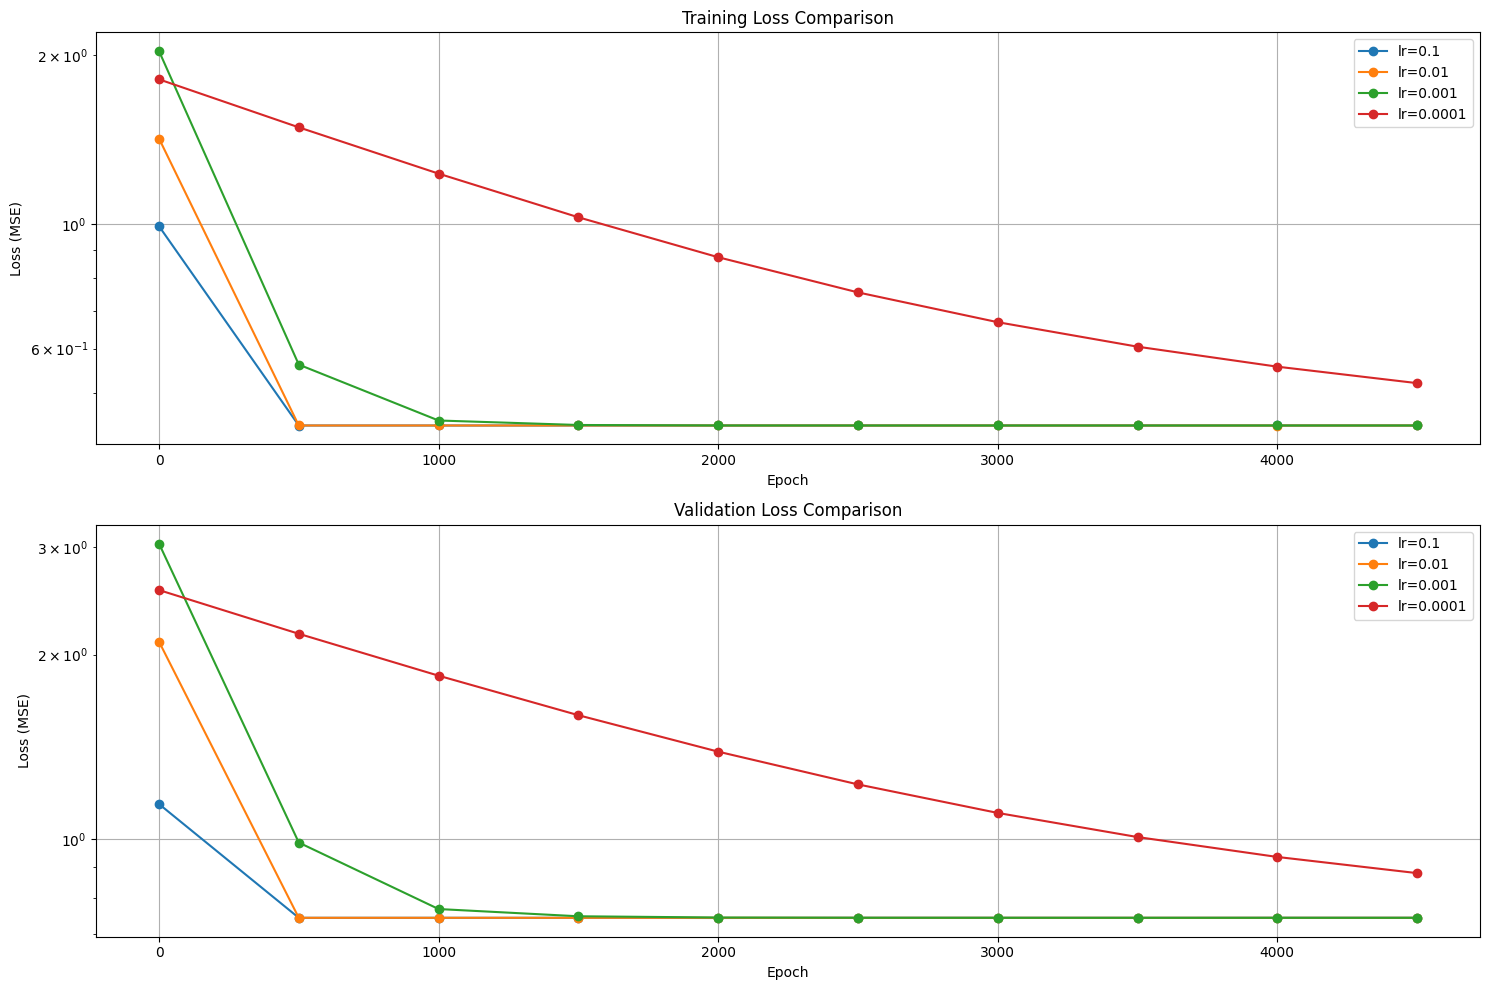


Final Losses:

Learning Rate: 0.1
Final Training Loss: 0.437832
Final Validation Loss: 0.743571

Learning Rate: 0.01
Final Training Loss: 0.437832
Final Validation Loss: 0.743571

Learning Rate: 0.001
Final Training Loss: 0.437832
Final Validation Loss: 0.743571

Learning Rate: 0.0001
Final Training Loss: 0.520885
Final Validation Loss: 0.879618

Best Learning Rate: 0.1

Best Model Weights: [0.38728824 0.06433923 0.32199642 0.2416677  0.16421382]
Best Model Bias: 0.00031251044129021466


In [6]:
#Question2
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Data Loading and Preprocessing
def load_and_preprocess_data():
    # Load dataset
    df = pd.read_csv('https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv')

    # Extract features and target
    X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
    y = df['price'].values

    # Split data (80-20)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    X_scaler = StandardScaler()
    X_train_scaled = X_scaler.fit_transform(X_train)
    X_val_scaled = X_scaler.transform(X_val)

    # Scale target
    y_scaler = StandardScaler()
    y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
    y_val_scaled = y_scaler.transform(y_val.reshape(-1, 1)).flatten()

    # Convert to tensors
    X_train = torch.FloatTensor(X_train_scaled)
    y_train = torch.FloatTensor(y_train_scaled)
    X_val = torch.FloatTensor(X_val_scaled)
    y_val = torch.FloatTensor(y_val_scaled)

    return X_train, y_train, X_val, y_val, (X_scaler, y_scaler)

# 2. Model Definition
class LinearRegression(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x).squeeze()

# 3. Training Function
def train_model(lr, X_train, y_train, X_val, y_val):
    # Model initialization
    model = LinearRegression(X_train.shape[1])
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses = []
    val_losses = []

    print(f"\nTraining with learning rate: {lr}")

    for epoch in range(5000):
        # Training
        model.train()
        optimizer.zero_grad()

        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        loss.backward()
        optimizer.step()

        # Validation
        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = criterion(y_val_pred, y_val)

        if epoch % 500 == 0:
            print(f'Epoch {epoch}, Training Loss: {loss.item():.6f}, Validation Loss: {val_loss.item():.6f}')
            train_losses.append(loss.item())
            val_losses.append(val_loss.item())

    return model, train_losses, val_losses

# Load data
X_train, y_train, X_val, y_val, scalers = load_and_preprocess_data()

# Train models with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
results = {}

for lr in learning_rates:
    model, train_losses, val_losses = train_model(lr, X_train, y_train, X_val, y_val)
    results[lr] = {
        'model': model,
        'train_losses': train_losses,
        'val_losses': val_losses
    }

# Plotting
plt.figure(figsize=(15, 10))

# Training losses
plt.subplot(2, 1, 1)
for lr in learning_rates:
    plt.plot(range(0, 5000, 500),
             results[lr]['train_losses'],
             marker='o',
             label=f'lr={lr}')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.yscale('log')

# Validation losses
plt.subplot(2, 1, 2)
for lr in learning_rates:
    plt.plot(range(0, 5000, 500),
             results[lr]['val_losses'],
             marker='o',
             label=f'lr={lr}')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.yscale('log')

plt.tight_layout()
plt.show()

# Print final losses and find best model
print("\nFinal Losses:")
for lr in learning_rates:
    final_train_loss = results[lr]['train_losses'][-1]
    final_val_loss = results[lr]['val_losses'][-1]
    print(f"\nLearning Rate: {lr}")
    print(f"Final Training Loss: {final_train_loss:.6f}")
    print(f"Final Validation Loss: {final_val_loss:.6f}")

# Find best model based on validation loss
best_lr = min(learning_rates,
              key=lambda lr: results[lr]['val_losses'][-1])
print(f"\nBest Learning Rate: {best_lr}")

# Get parameters of best model
best_model = results[best_lr]['model']
with torch.no_grad():
    for name, param in best_model.named_parameters():
        if name == 'linear.weight':
            print("\nBest Model Weights:", param.numpy().flatten())
        elif name == 'linear.bias':
            print("Best Model Bias:", param.item())



Training with learning rate: 0.1
Epoch 0, Training Loss: 1.016690, Validation Loss: 1.000128
Epoch 500, Training Loss: 0.314557, Validation Loss: 0.574611
Epoch 1000, Training Loss: 0.314557, Validation Loss: 0.574611
Epoch 1500, Training Loss: 0.314557, Validation Loss: 0.574611
Epoch 2000, Training Loss: 0.314586, Validation Loss: 0.573273
Epoch 2500, Training Loss: 0.314557, Validation Loss: 0.574611
Epoch 3000, Training Loss: 0.314557, Validation Loss: 0.574590
Epoch 3500, Training Loss: 0.314611, Validation Loss: 0.574504
Epoch 4000, Training Loss: 0.314557, Validation Loss: 0.574611
Epoch 4500, Training Loss: 0.314557, Validation Loss: 0.574754

Training with learning rate: 0.01
Epoch 0, Training Loss: 0.948425, Validation Loss: 1.514166
Epoch 500, Training Loss: 0.314557, Validation Loss: 0.574611
Epoch 1000, Training Loss: 0.314557, Validation Loss: 0.574611
Epoch 1500, Training Loss: 0.314557, Validation Loss: 0.574611
Epoch 2000, Training Loss: 0.314557, Validation Loss: 0.5

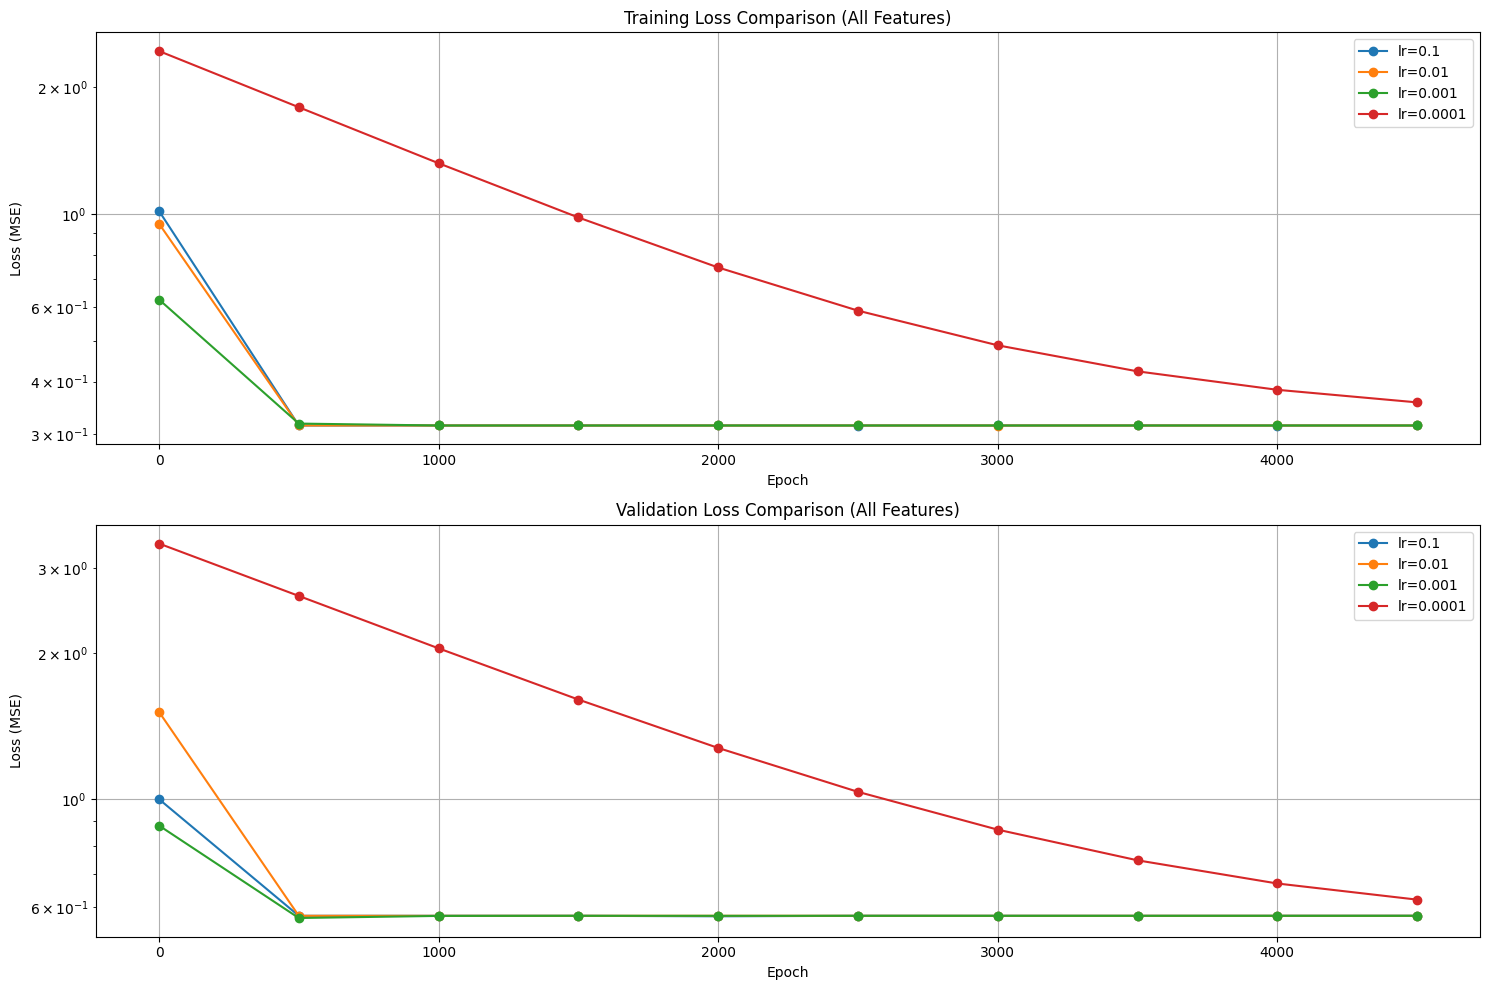


Final Losses:

Learning Rate: 0.1
Final Training Loss: 0.314557
Final Validation Loss: 0.574754

Learning Rate: 0.01
Final Training Loss: 0.314557
Final Validation Loss: 0.574611

Learning Rate: 0.001
Final Training Loss: 0.314557
Final Validation Loss: 0.574611

Learning Rate: 0.0001
Final Training Loss: 0.356951
Final Validation Loss: 0.620494

Best Learning Rate: 0.01

Best Model Parameters:
Feature Weights:
area: 0.2957
bedrooms: 0.0334
bathrooms: 0.2979
stories: 0.1983
mainroad: 0.0730
guestroom: 0.0509
basement: 0.1073
hotwaterheating: 0.0857
airconditioning: 0.2064
parking: 0.1098
prefarea: 0.1519
furnishingstatus: -0.0901
Bias: 0.0000

Model Performance:
Training R² Score: 0.6854
Validation R² Score: 0.6495


In [8]:
#Question3
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

def load_and_preprocess_data():
    # Load dataset
    df = pd.read_csv('https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv')

    # Handle categorical variables
    le = LabelEncoder()
    categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                         'airconditioning', 'prefarea', 'furnishingstatus']

    for col in categorical_columns:
        df[col] = le.fit_transform(df[col])

    # Extract all features and target
    features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
               'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
               'parking', 'prefarea', 'furnishingstatus']

    X = df[features].values
    y = df['price'].values

    # Split data (80-20)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    X_scaler = StandardScaler()
    X_train_scaled = X_scaler.fit_transform(X_train)
    X_val_scaled = X_scaler.transform(X_val)

    # Scale target
    y_scaler = StandardScaler()
    y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
    y_val_scaled = y_scaler.transform(y_val.reshape(-1, 1)).flatten()

    # Convert to tensors
    X_train = torch.FloatTensor(X_train_scaled)
    y_train = torch.FloatTensor(y_train_scaled)
    X_val = torch.FloatTensor(X_val_scaled)
    y_val = torch.FloatTensor(y_val_scaled)

    return X_train, y_train, X_val, y_val, (X_scaler, y_scaler), features

class LinearRegression(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x).squeeze()

def train_model(lr, X_train, y_train, X_val, y_val):
    model = LinearRegression(X_train.shape[1])
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses = []
    val_losses = []

    print(f"\nTraining with learning rate: {lr}")

    for epoch in range(5000):
        # Training
        model.train()
        optimizer.zero_grad()

        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        loss.backward()
        optimizer.step()

        # Validation
        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = criterion(y_val_pred, y_val)

        if epoch % 500 == 0:
            print(f'Epoch {epoch}, Training Loss: {loss.item():.6f}, Validation Loss: {val_loss.item():.6f}')
            train_losses.append(loss.item())
            val_losses.append(val_loss.item())

    return model, train_losses, val_losses

# Load data with all features
X_train, y_train, X_val, y_val, scalers, feature_names = load_and_preprocess_data()

# Train models with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
results = {}

for lr in learning_rates:
    model, train_losses, val_losses = train_model(lr, X_train, y_train, X_val, y_val)
    results[lr] = {
        'model': model,
        'train_losses': train_losses,
        'val_losses': val_losses
    }

# Plotting
plt.figure(figsize=(15, 10))

# Training losses
plt.subplot(2, 1, 1)
for lr in learning_rates:
    plt.plot(range(0, 5000, 500),
             results[lr]['train_losses'],
             marker='o',
             label=f'lr={lr}')
plt.title('Training Loss Comparison (All Features)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.yscale('log')

# Validation losses
plt.subplot(2, 1, 2)
for lr in learning_rates:
    plt.plot(range(0, 5000, 500),
             results[lr]['val_losses'],
             marker='o',
             label=f'lr={lr}')
plt.title('Validation Loss Comparison (All Features)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.yscale('log')

plt.tight_layout()
plt.show()

# Print final losses and find best model
print("\nFinal Losses:")
for lr in learning_rates:
    final_train_loss = results[lr]['train_losses'][-1]
    final_val_loss = results[lr]['val_losses'][-1]
    print(f"\nLearning Rate: {lr}")
    print(f"Final Training Loss: {final_train_loss:.6f}")
    print(f"Final Validation Loss: {final_val_loss:.6f}")

# Find best model based on validation loss
best_lr = min(learning_rates,
              key=lambda lr: results[lr]['val_losses'][-1])
print(f"\nBest Learning Rate: {best_lr}")

# Get and display parameters of best model
best_model = results[best_lr]['model']
with torch.no_grad():
    weights = best_model.linear.weight.numpy().flatten()
    bias = best_model.linear.bias.item()

    print("\nBest Model Parameters:")
    print("Feature Weights:")
    for feature, weight in zip(feature_names, weights):
        print(f"{feature}: {weight:.4f}")
    print(f"Bias: {bias:.4f}")

# Calculate R² scores for best model
X_scaler, y_scaler = scalers
best_model.eval()
with torch.no_grad():
    y_train_pred = best_model(X_train)
    y_val_pred = best_model(X_val)

    # Convert predictions back to original scale
    y_train_pred_orig = y_scaler.inverse_transform(y_train_pred.numpy().reshape(-1, 1))
    y_val_pred_orig = y_scaler.inverse_transform(y_val_pred.numpy().reshape(-1, 1))
    y_train_orig = y_scaler.inverse_transform(y_train.numpy().reshape(-1, 1))
    y_val_orig = y_scaler.inverse_transform(y_val.numpy().reshape(-1, 1))

from sklearn.metrics import r2_score
train_r2 = r2_score(y_train_orig, y_train_pred_orig)
val_r2 = r2_score(y_val_orig, y_val_pred_orig)

print("\nModel Performance:")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Validation R² Score: {val_r2:.4f}")